In [1]:
# First up, the usual loading of the data from the CSV. 

import pandas
import operator
import matplotlib.pyplot as plt

# Let python create the column names list:
with open('../data/talks_6d.csv') as f:
    colnames = f.readline().strip().split(",")

# Load the dataframe
TEDtalks = pandas.read_csv('../data/talks_6d.csv', names=colnames)

# Create a list of the talks by women speakers
# Printing length is to make sure things went as expected.
f_talks = TEDtalks[TEDtalks.gender == 'female'].text.tolist()

# Line for talks by men
# m_talks = TEDtalks[TEDtalks.gender == 'male'].text.tolist()
print(len(f_talks))

607


In [2]:
# We are not going to create a dictionary or an NLTK FreqDist, 
# we are going to use sklearn's **term frequency** vectorizer.

import nltk 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# We have our choice of tokenization options.
my_tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+').tokenize

# Here we simply set the TF vectorizer to use our tokenizer
vectorizer = CountVectorizer(tokenizer = my_tokenizer)
   
X = vectorizer.fit_transform(f_talks)

X.shape

(607, 30852)

The two cells below are works-in-progress.

In [3]:
word_total = X.sum(axis=0) # sum each columns to get total counts for each word
talk_total = (X > 0).sum(axis=0)

vocab = [v[0] for v in sorted(vectorizer.vocabulary_.items(), key=operator.itemgetter(1))]
vocab = np.array([vocab])

OneBigArray = np.concatenate((vocab.T,word_total.T,talk_total.T), axis = 1)

In [9]:
np.savetxt('../data/onebigarray.csv', OneBigArray, delimiter=',',fmt="%s")

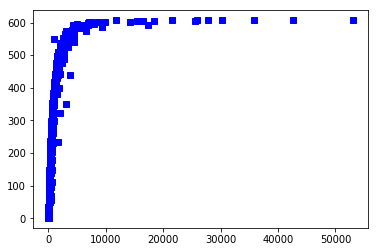

In [5]:
plt.plot(word_total, talk_total, 'bs')
plt.show()

In [8]:
talk_total.shape

(1, 30852)

In [11]:
np.array([vocab]).shape

(1, 30852)

In [4]:
# this freq will correspond to value in dictionary vectorizer.vocabulary_

import operator
# get vocabulary keys, sorted by value
vocab = [v[0] for v in sorted(vectorizer.vocabulary_.items(), key=operator.itemgetter(1))]
fdist = dict(zip(vocab, freq)) # return same format as nltk

## Notes for KK

So building the array is considerably faster than building a dictionary. Summing each column to get overall term frequency seems straightforward, though getting those sums back out and associated with the correct term is something still in progress. 

The reason for switching from the more traditional way of getting word counts -- through a collection or a dictionary -- is to track the number of texts in which a word occurs as well. This is a variation, almost an inversion, of TFIDF: we are looking for high frequency words and those words that also occur across a number of texts are more representative than those terms that occur in only one or a few. If there's a proper statistical way to do this, or term to call it, teach me!

Thus it's my hope that there is a way to count the number of non-zero entries for a word, such that we can sum its total frequency *and* its total text count. I'm imagining tallies that look like this. (Please note that these are made up.)

    pms, 49, 1
    vagina, 62, 5

Once we have these for both male and female speakers, we can then visualize a spread, with bars coming off a central axis -- I'm imagining a vertical axis and horizontal bars because I've seen something like it somewhere -- that displays this data.